In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

In [29]:
#load the dataset 

bank_df = pd.read_csv('/kaggle/input/bank-marketing/bank-additional-full.csv',delimiter=';')
bank_df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


**Descriptive Statistics of data**

In [30]:
#about the dataset
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [31]:
bank_df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


Data Visualization

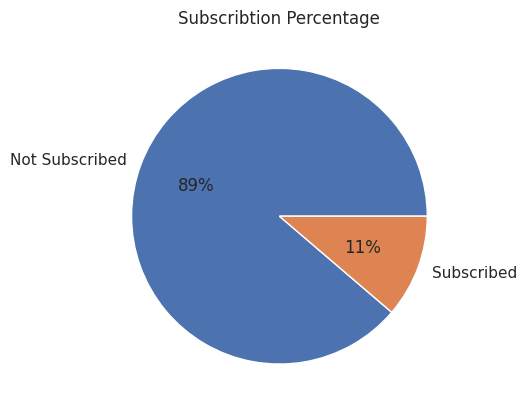

In [32]:
import matplotlib.pyplot as plt

Y = bank_df['y'].value_counts()

label=['Not Subscribed','Subscribed']
plt.pie(Y,labels=label,autopct='%.0f%%')
plt.title('Subscribtion Percentage')
plt.show()

About 11% of total customers subscribed to the term deposit.

**Univariate Analysis**

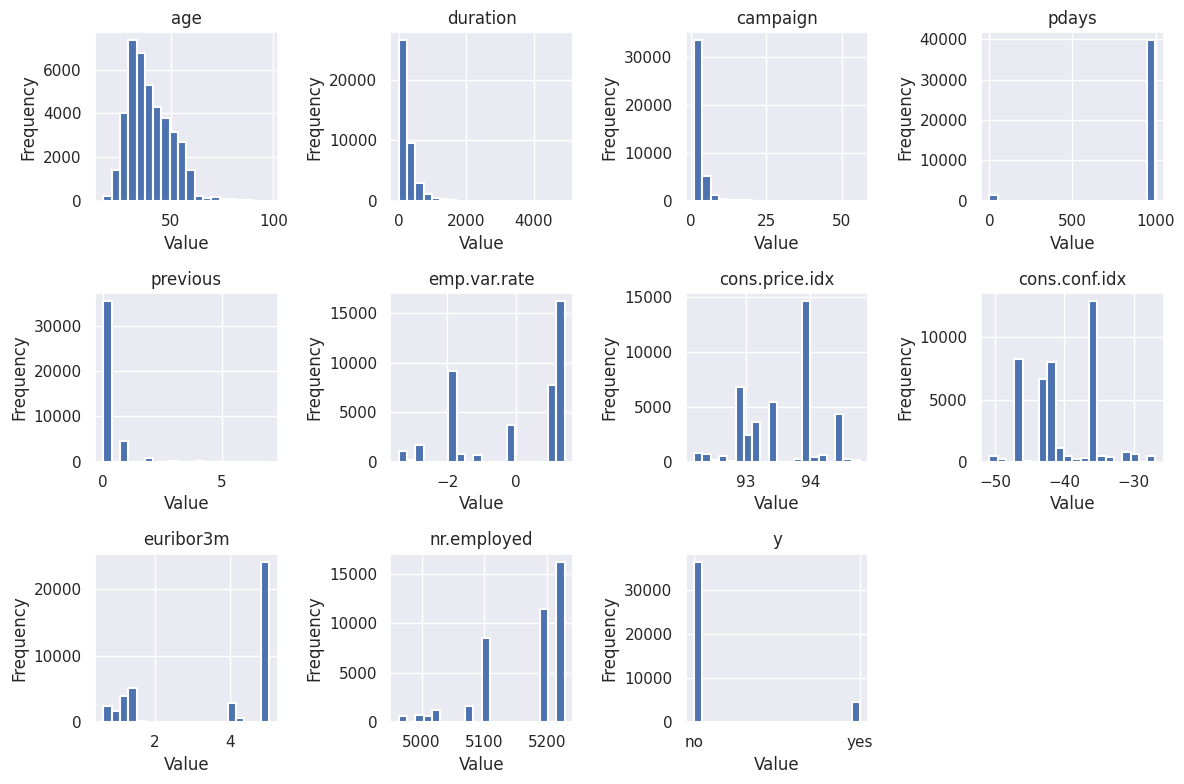

In [33]:
#Numerical Columns



Num_column = bank_df[['age','duration', 'campaign', 'pdays',
       'previous','emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed','y']]


plt.figure(figsize=(12, 8))
for i, column in enumerate(Num_column, 1):
    plt.subplot(3, 4, i)
    plt.hist(bank_df[column], bins=20, linewidth=1.5)
    plt.title(column)
    plt.xlabel('Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

**Bivariate Analysis of Numerical Variable **

In [34]:
bank_df['y'] = bank_df['y'].replace(['yes','no'],[1,0])

/tmp/ipykernel_33/1586966348.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  bank_df['y'] = bank_df['y'].replace(['yes','no'],[1,0])


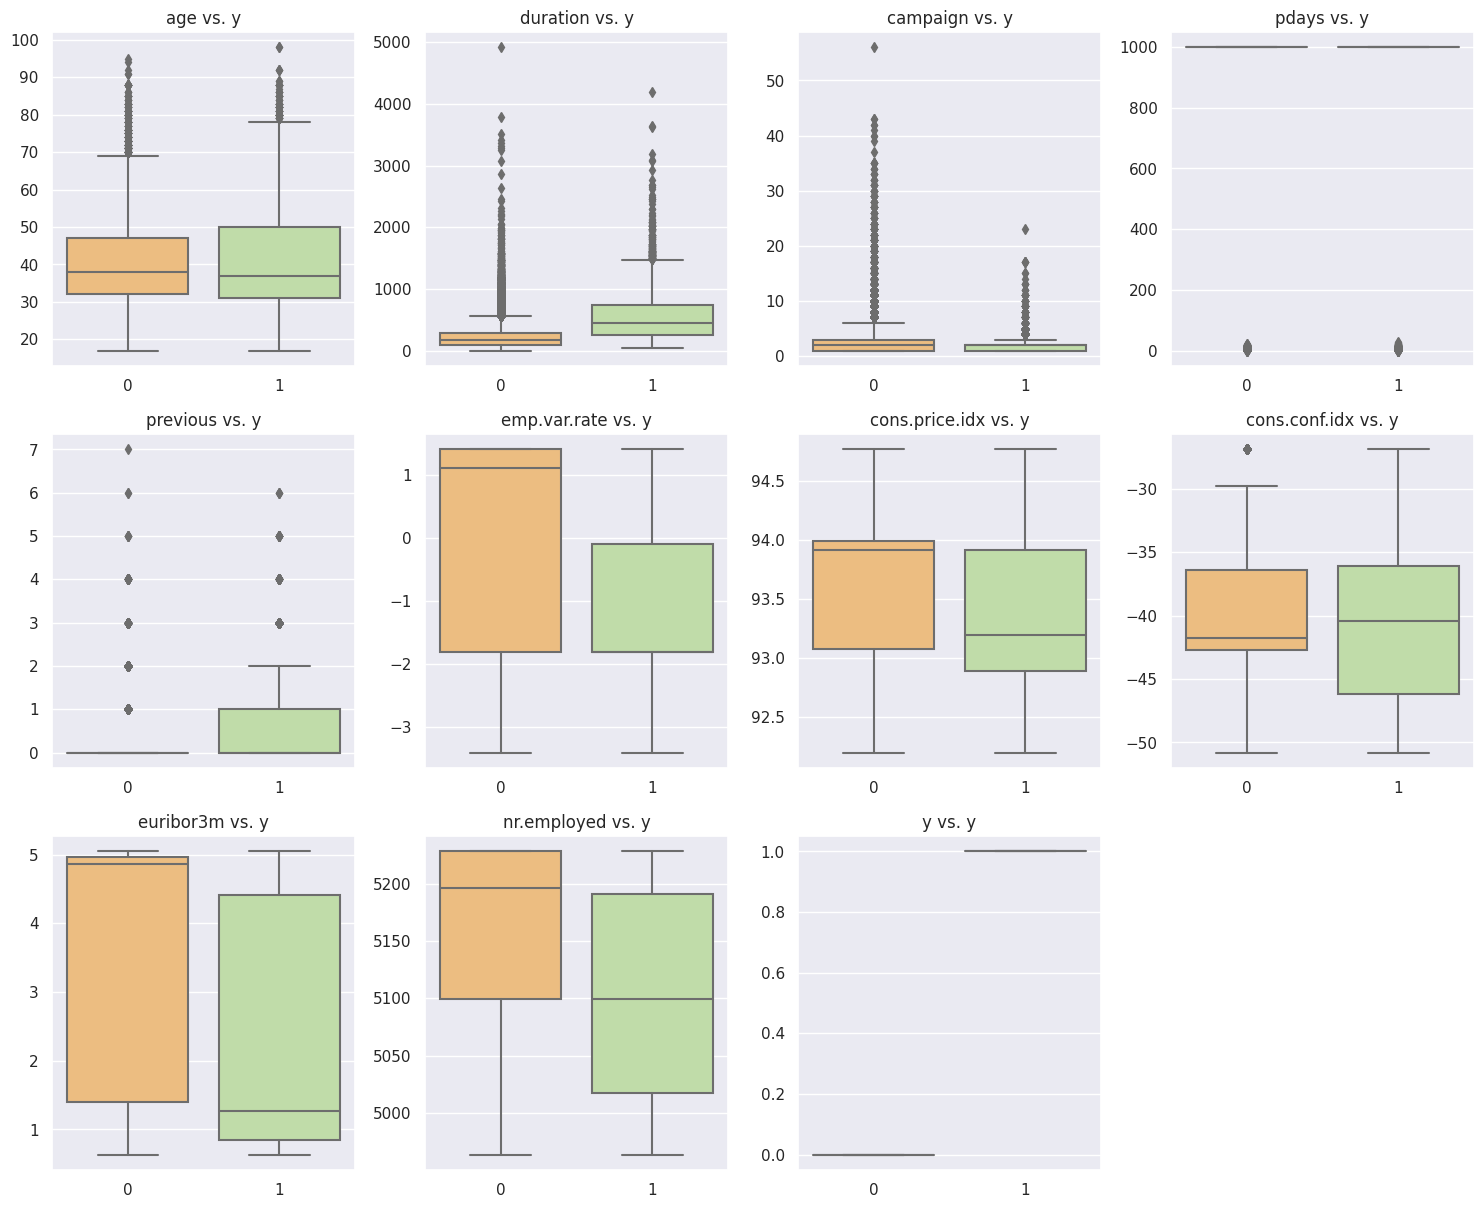

In [35]:
plt.figure(figsize=(15, 20))
for i, column in enumerate(Num_column, 1):
    plt.subplot(5, 4, i)
    sns.boxplot(data=bank_df, x='y', y=column, palette='Spectral')
    plt.title(f'{column} vs. y')
    plt.xlabel(None)
    plt.ylabel(None)

plt.tight_layout()
plt.show()


**Univariate Analysis of Categorical Variables **

In [36]:
cat_df = bank_df[['job', 'marital', 'education', 'default', 'housing', 'loan',
                  'contact', 'month', 'day_of_week', 'poutcome', 'y']]

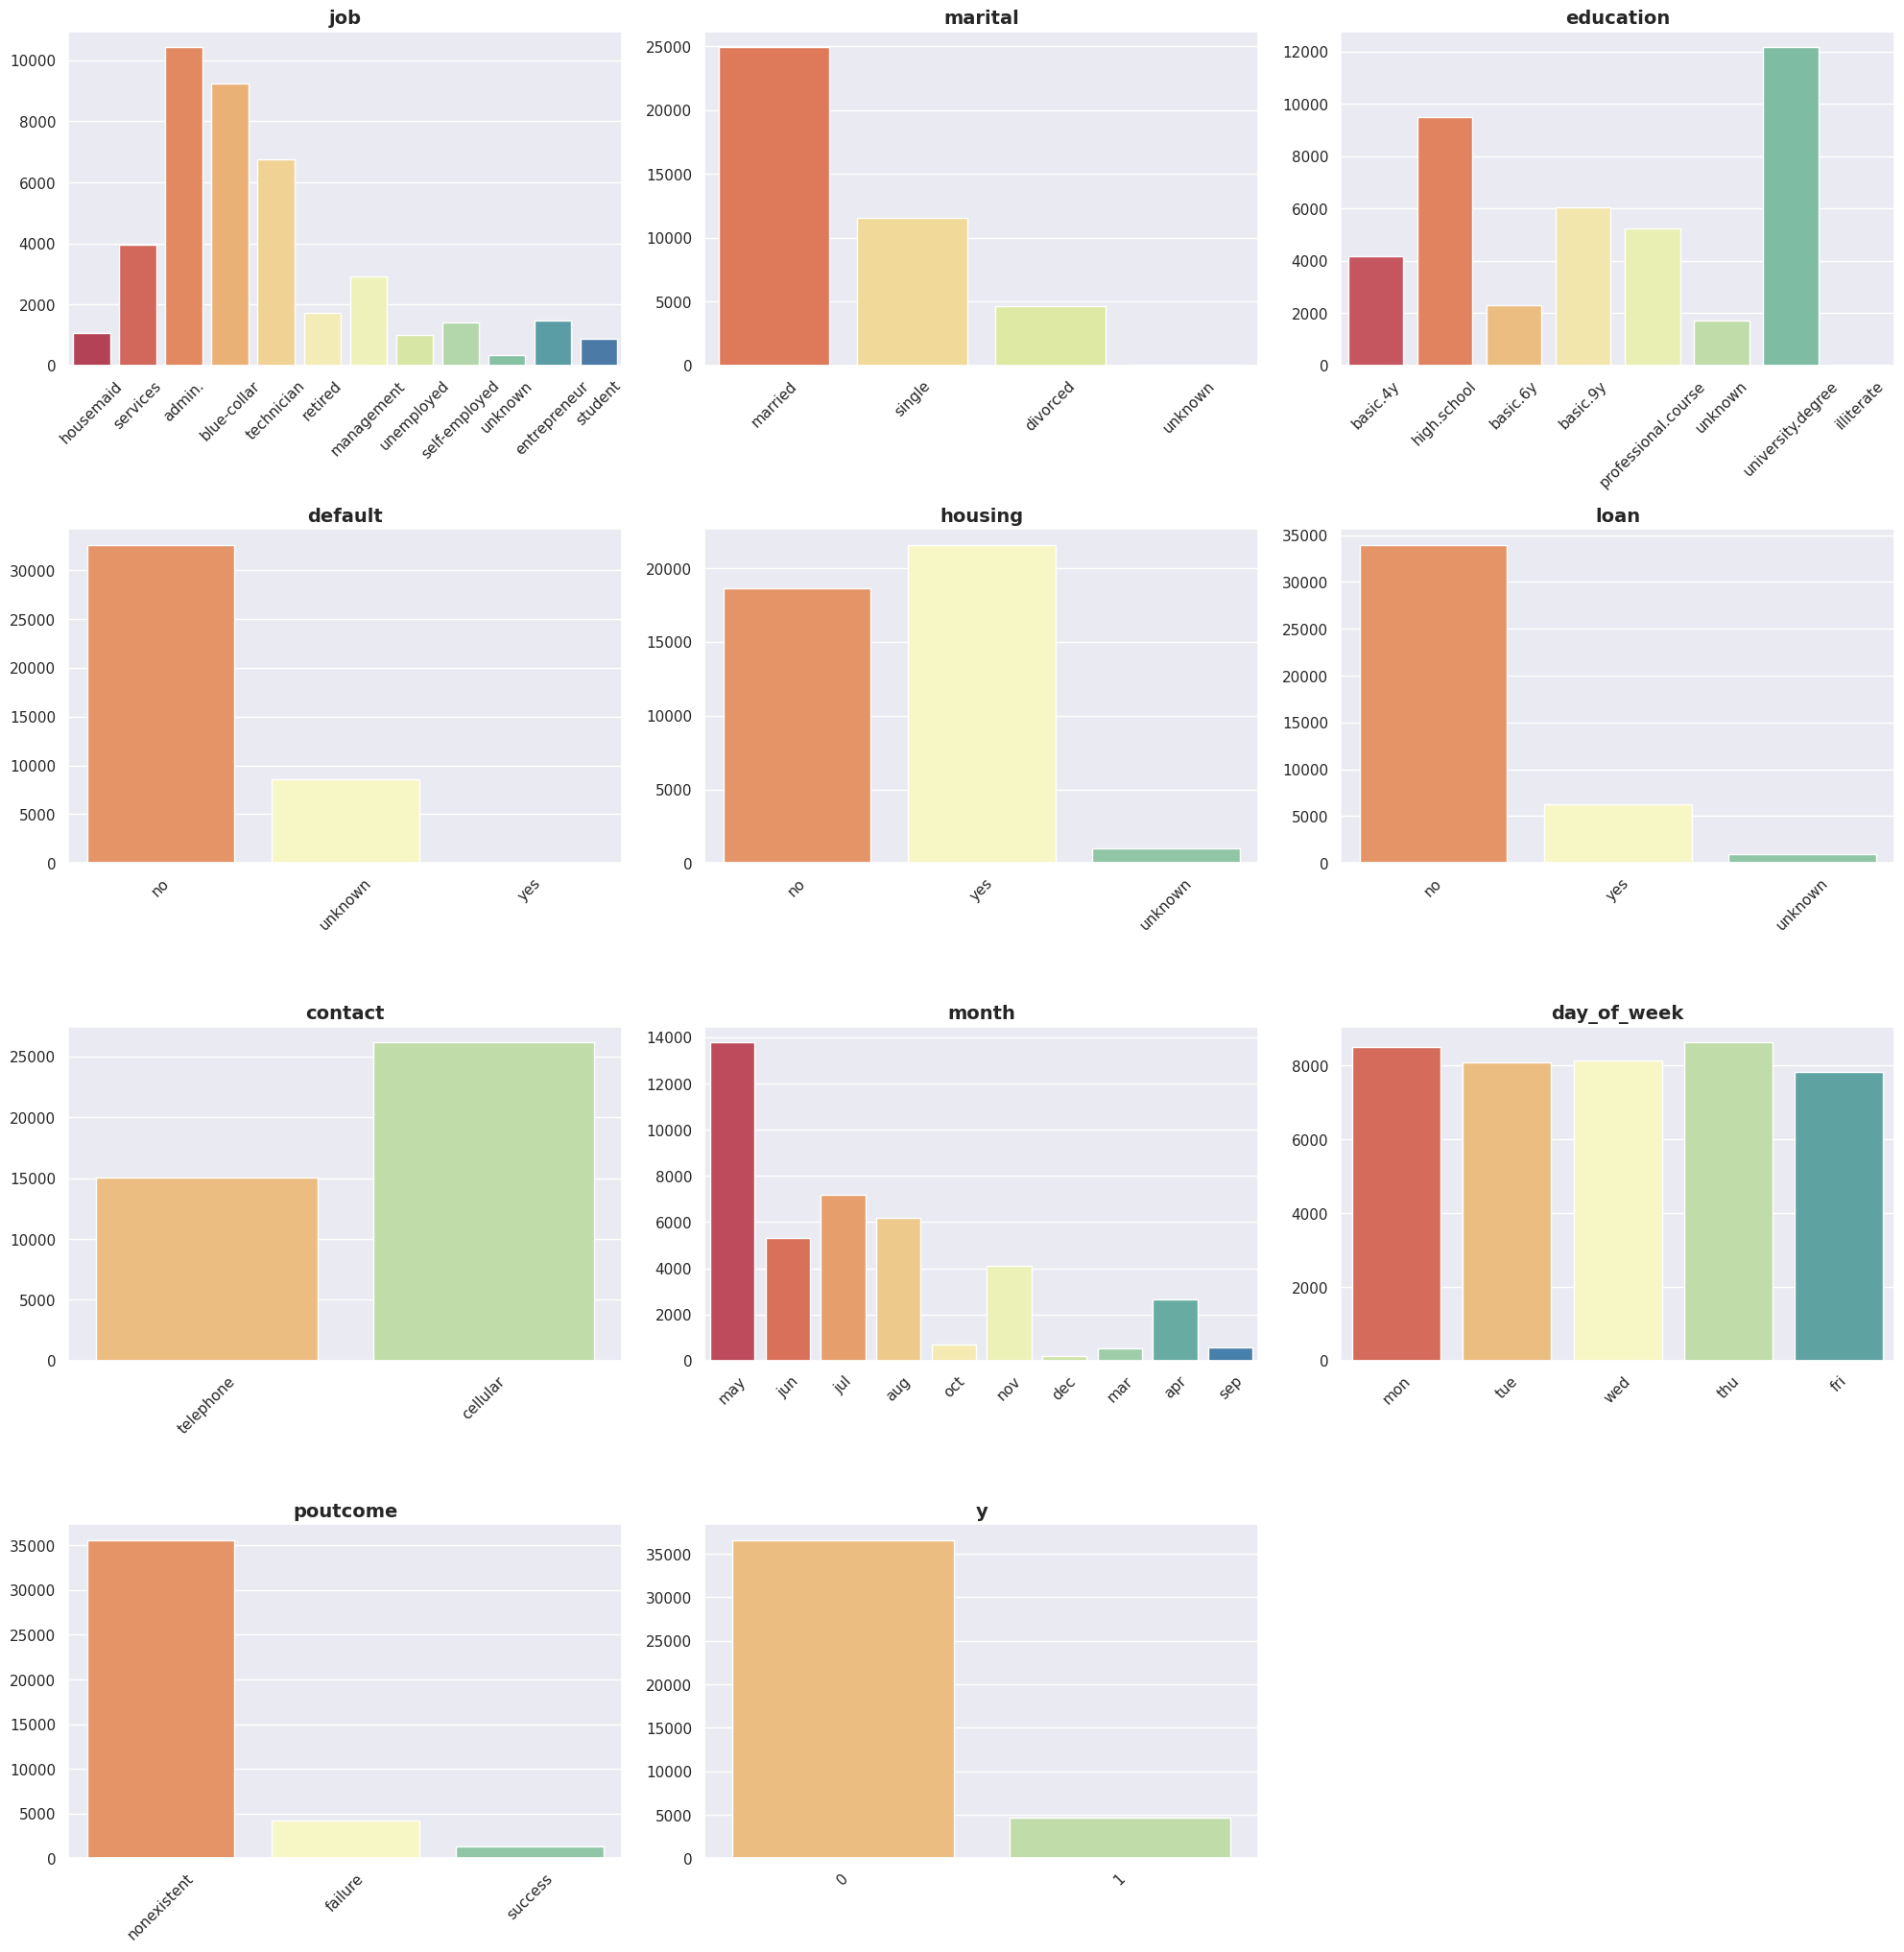

In [37]:
plt.figure(figsize=(20, 30))
for i, column in enumerate(cat_df, 1):
    plt.subplot(6, 3, i)
    sns.countplot(data=bank_df, x=column, palette='Spectral')
    plt.title(column, fontsize=14, fontweight='bold') 
    plt.xlabel(None)
    plt.ylabel(None)
    plt.xticks(rotation=45)  

plt.tight_layout()
plt.show()

**Bivariate analysis - Categorical Variable**


In [38]:
def plot_distribution(dataframe, column, ax):
    """
    Plot variable distribution in a stacked bar plot of Subcribed vs not subscribed.
    """
    
    # Create a temporal dataframe with the data to be plot
    temp = pd.DataFrame({"subscribed": dataframe[dataframe["y"]==1][column].value_counts(),
                         "Not subscribed": dataframe[dataframe["y"]==0][column].value_counts()})
    # Plot the bar plot
    temp.plot(kind='bar', ax=ax, stacked=True)
    # Set the plot title
    ax.set_title(f'Distribution of {column} by Subcription status',loc='left')
    plt.xlabel(None)
    plt.ylabel(None)
    ax.tick_params(axis ='x', rotation=360) 
    


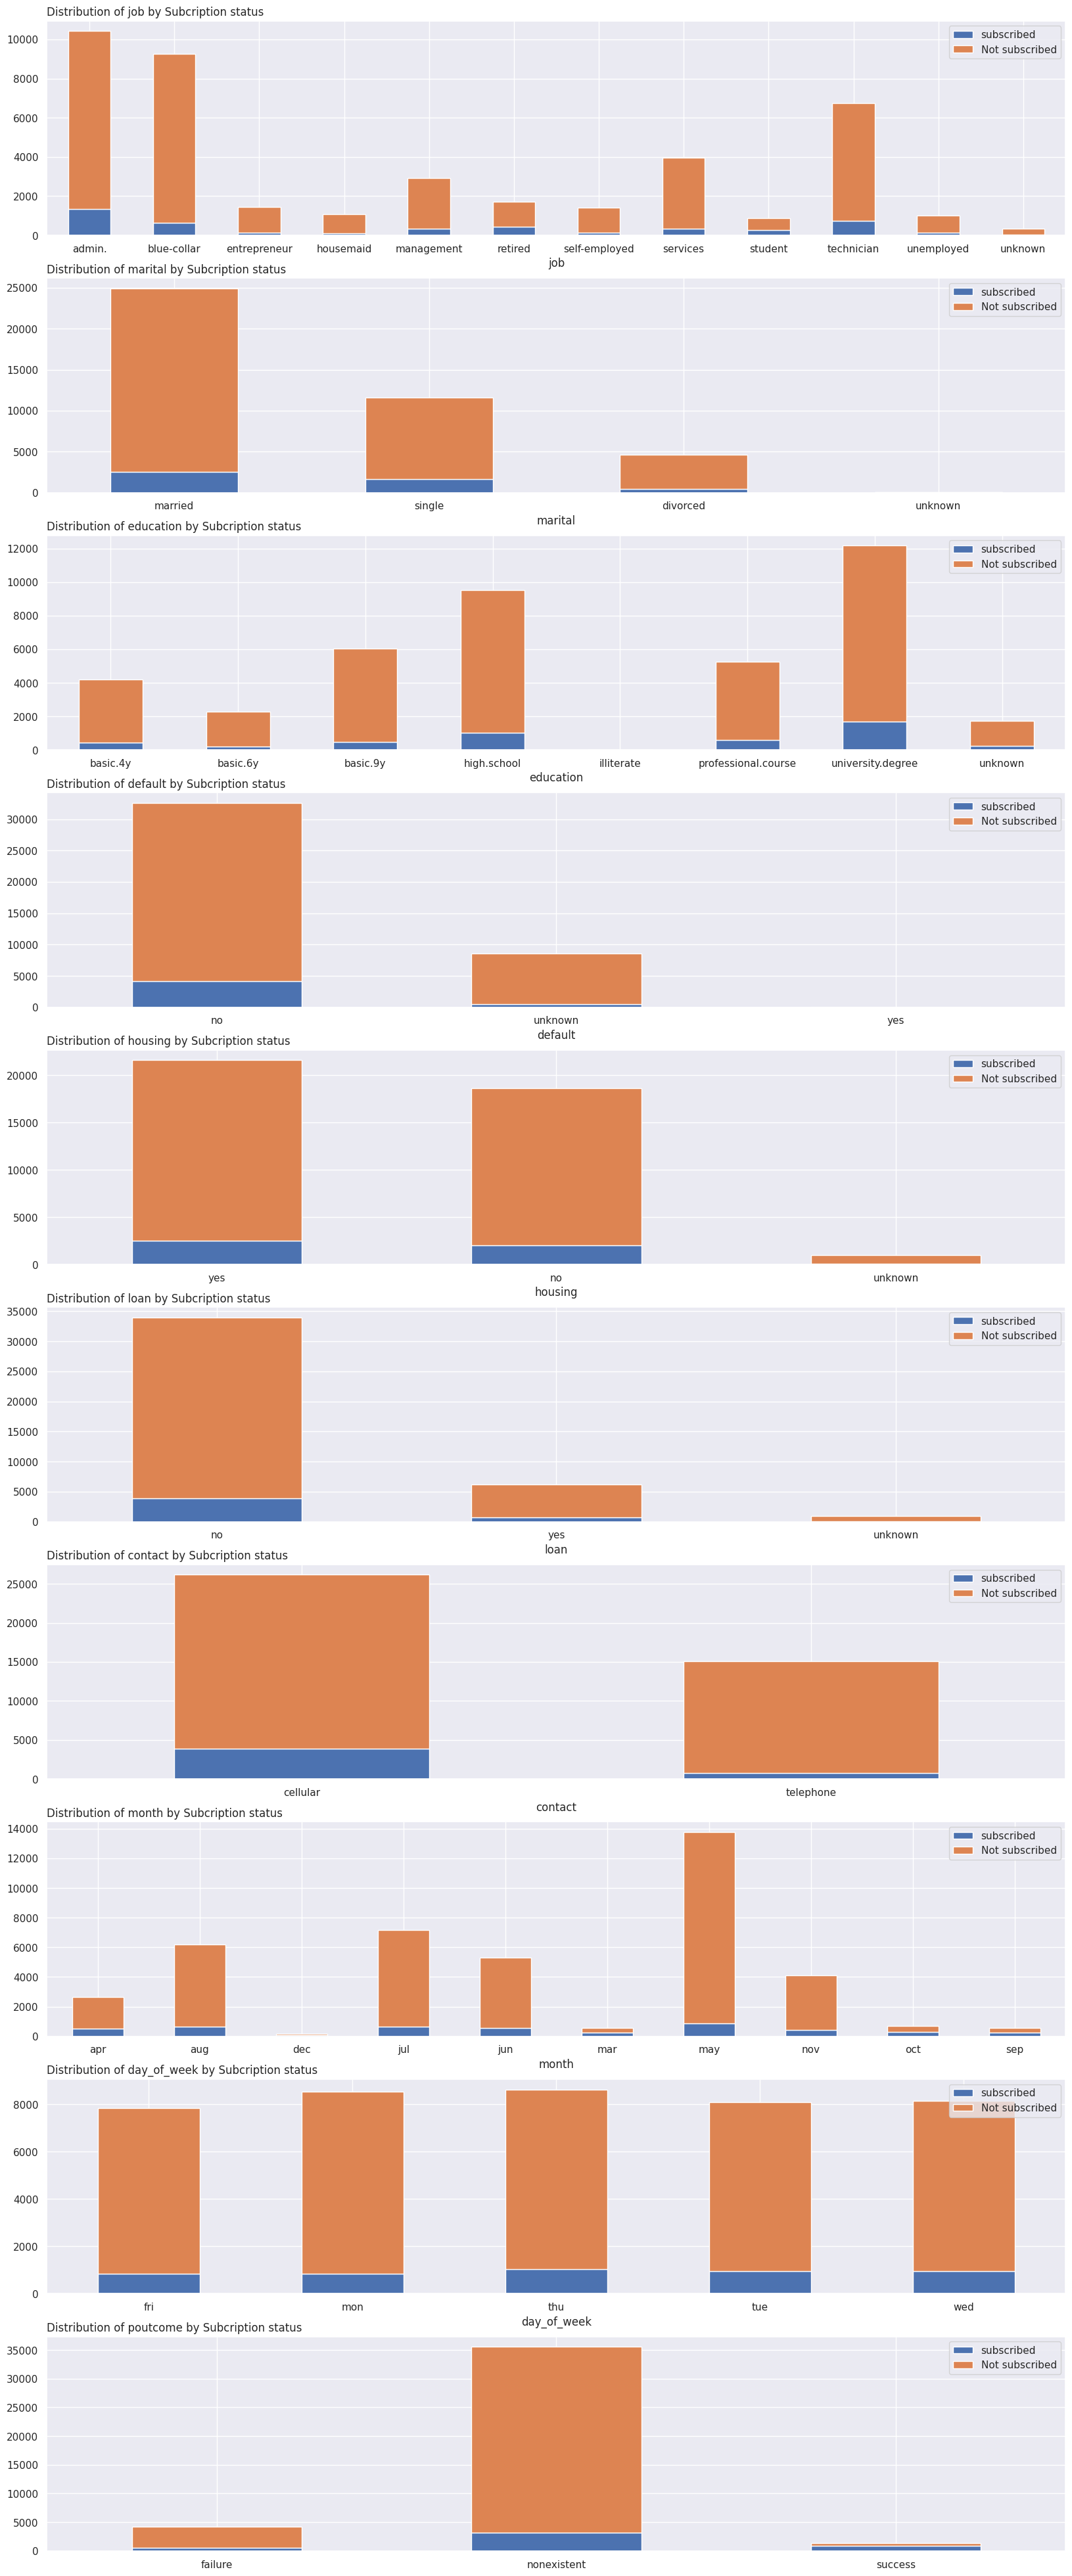

In [39]:


fig, axs = plt.subplots(nrows=10, figsize=(20, 50))
for i, column in enumerate(cat_df.columns[:-1]):
    plot_distribution(cat_df, column, axs[i])
   




**Feature Engineering**

In [40]:
#Replacing categorical values to binary format.
bank_df['contact'] = bank_df['contact'].replace(['cellular','telephone'],[1,0])


/tmp/ipykernel_33/3224421228.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  bank_df['contact'] = bank_df['contact'].replace(['cellular','telephone'],[1,0])


In [83]:
Num_column['y'] = Num_column['y'].replace(['yes','no'],[1,0])
Num_column.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   duration        41188 non-null  int64  
 2   campaign        41188 non-null  int64  
 3   pdays           41188 non-null  int64  
 4   previous        41188 non-null  int64  
 5   emp.var.rate    41188 non-null  float64
 6   cons.price.idx  41188 non-null  float64
 7   cons.conf.idx   41188 non-null  float64
 8   euribor3m       41188 non-null  float64
 9   nr.employed     41188 non-null  float64
 10  y               41188 non-null  int64  
dtypes: float64(5), int64(6)
memory usage: 3.5 MB


/tmp/ipykernel_33/1140457303.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Num_column['y'] = Num_column['y'].replace(['yes','no'],[1,0])


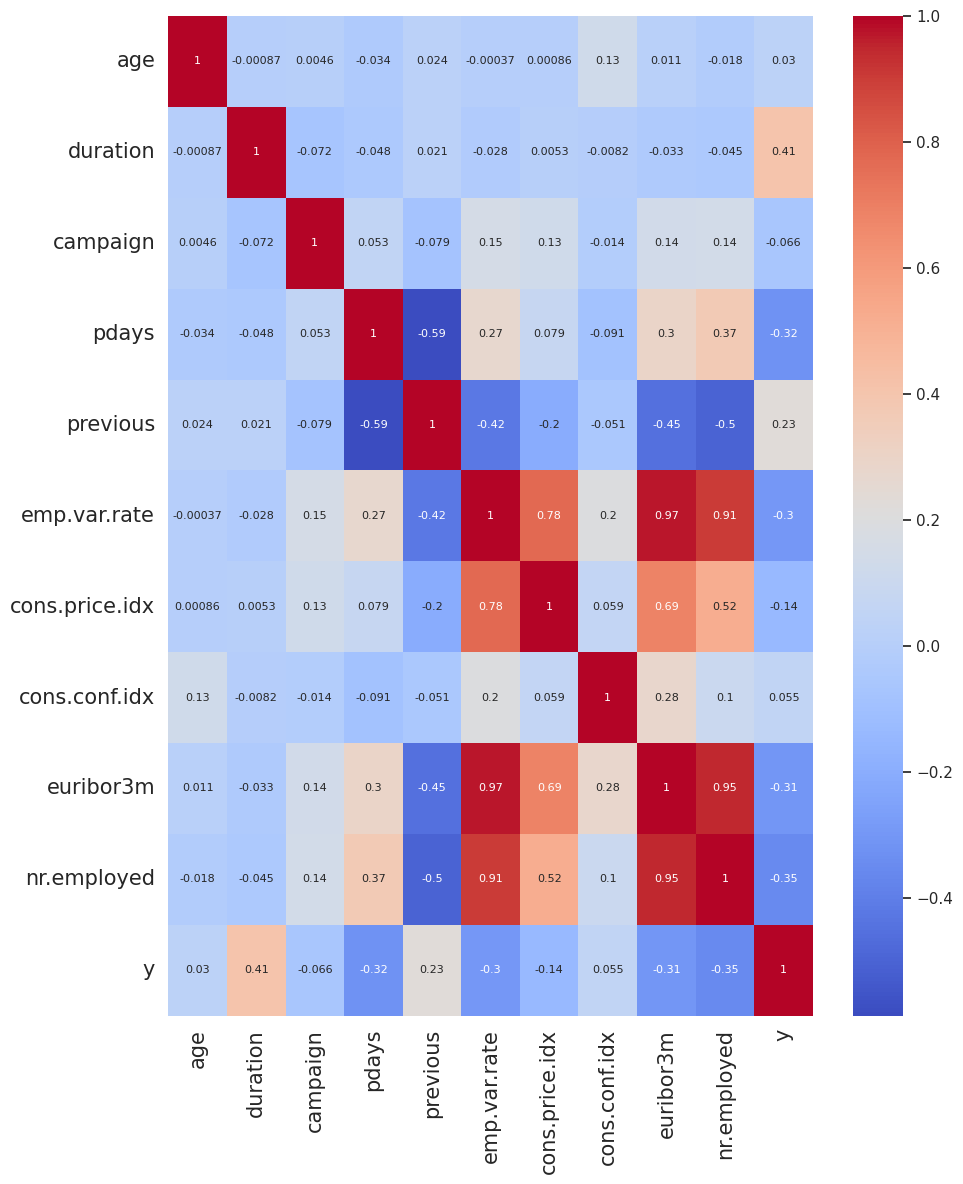

In [86]:
#Plot Correlation Matrix
correlation_matrix = Num_column.corr()
plt.figure(figsize=(10,12))
sns.heatmap(
    correlation_matrix,
    xticklabels=correlation_matrix.columns.values,
    yticklabels=correlation_matrix.columns.values, 
    annot=True, 
    cmap = 'coolwarm',
    annot_kws={'size': 8})
# Axis ticks size
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.tight_layout()
plt.show()

From the correlation matrix, we can see there are strong correlation that exsist among independent variables. Once of the main assumption when processing machine learning model is that all the variables that are provided should be independent variables. Thus, it is a best practice to remove those columns that has strong correlation. Here, the variables named 'euribor3m', 'nr.employed','emp.var.rate' has high correlation greater than 0.95. Thus those columns where removed.

In [42]:
#drop columns where correlation values is greater than 0.95
bank_df = bank_df.drop(columns=['euribor3m', 'nr.employed','emp.var.rate'])
bank_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,y
0,56,housemaid,married,basic.4y,no,no,no,0,may,mon,261,1,999,0,nonexistent,93.994,-36.4,0
1,57,services,married,high.school,unknown,no,no,0,may,mon,149,1,999,0,nonexistent,93.994,-36.4,0
2,37,services,married,high.school,no,yes,no,0,may,mon,226,1,999,0,nonexistent,93.994,-36.4,0
3,40,admin.,married,basic.6y,no,no,no,0,may,mon,151,1,999,0,nonexistent,93.994,-36.4,0
4,56,services,married,high.school,no,no,yes,0,may,mon,307,1,999,0,nonexistent,93.994,-36.4,0


In [43]:
# Drop 'Duration' column as per data description
bank_df.drop(columns=['duration'], inplace=True)


In [44]:
bank_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,y
0,56,housemaid,married,basic.4y,no,no,no,0,may,mon,1,999,0,nonexistent,93.994,-36.4,0
1,57,services,married,high.school,unknown,no,no,0,may,mon,1,999,0,nonexistent,93.994,-36.4,0
2,37,services,married,high.school,no,yes,no,0,may,mon,1,999,0,nonexistent,93.994,-36.4,0
3,40,admin.,married,basic.6y,no,no,no,0,may,mon,1,999,0,nonexistent,93.994,-36.4,0
4,56,services,married,high.school,no,no,yes,0,may,mon,1,999,0,nonexistent,93.994,-36.4,0


**Categorical Columns Processing**

In [45]:
bank_df.marital.value_counts()

marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64

Of three categories the unknown category has less count which could not lead to the significance changes in the model Hence, the unknown category is removed from the column 'marital'.


In [46]:
bank_df = bank_df[bank_df['marital'] != 'unknown']
bank_df.marital.value_counts()

marital
married     24928
single      11568
divorced     4612
Name: count, dtype: int64

Job column

In [47]:
bank_df.job.value_counts()

job
admin.           10408
blue-collar       9240
technician        6731
services          3963
management        2921
retired           1715
entrepreneur      1453
self-employed     1416
housemaid         1057
unemployed        1009
student            874
unknown            321
Name: count, dtype: int64

Similar to above, removing the unknown category from the column 'job'.


In [48]:
bank_df = bank_df[bank_df['job'] != 'unknown' ]
bank_df.job.value_counts()

job
admin.           10408
blue-collar       9240
technician        6731
services          3963
management        2921
retired           1715
entrepreneur      1453
self-employed     1416
housemaid         1057
unemployed        1009
student            874
Name: count, dtype: int64

Default column

In [49]:
bank_df.housing.value_counts()

housing
yes        21376
no         18427
unknown      984
Name: count, dtype: int64

Education column

In Education column there are so many categories. Now creating a new category which merges 'basic.9y','basic.4y','basic.6y' all three category as basic.school.

In [50]:
bank_df.education.value_counts()

education
university.degree      12096
high.school             9464
basic.9y                6006
professional.course     5225
basic.4y                4118
basic.6y                2264
unknown                 1596
illiterate                18
Name: count, dtype: int64

In [51]:
bank_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'cons.price.idx', 'cons.conf.idx', 'y'],
      dtype='object')

In [52]:
bank_df['education'] =bank_df['education'].replace(
    ['basic.9y','basic.4y','basic.6y'],'basic.school'
    )
bank_df.education.value_counts()

education
basic.school           12388
university.degree      12096
high.school             9464
professional.course     5225
unknown                 1596
illiterate                18
Name: count, dtype: int64

Age Column

Using Equal-width binning
Equal-width binning divides the range of values into equal-sized intervals or bins. 



In [53]:
#Create 5 equal sized interval bins for the column - age.
bank_df['age_group'] = pd.cut(bank_df['age'], bins=5, labels=[f'Group {i+1}' for i in range(5)])

bank_df['age_group'].value_counts()

age_group
Group 2    19943
Group 1    12931
Group 3     7306
Group 4      508
Group 5       99
Name: count, dtype: int64

In [54]:
#remove age column from the dataframe.
bank_df.drop(columns='age',inplace=True)

In [55]:
bank_df.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,y,age_group
0,housemaid,married,basic.school,no,no,no,0,may,mon,1,999,0,nonexistent,93.994,-36.4,0,Group 3
1,services,married,high.school,unknown,no,no,0,may,mon,1,999,0,nonexistent,93.994,-36.4,0,Group 3
2,services,married,high.school,no,yes,no,0,may,mon,1,999,0,nonexistent,93.994,-36.4,0,Group 2
3,admin.,married,basic.school,no,no,no,0,may,mon,1,999,0,nonexistent,93.994,-36.4,0,Group 2
4,services,married,high.school,no,no,yes,0,may,mon,1,999,0,nonexistent,93.994,-36.4,0,Group 3


One-hot encoding for the categorical columns present.

Categorical columns = 'job', 'marital', 'education', 'default', 'housing',
                     'loan', 'age_group','y'

In [56]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
# Perform one-hot encoding for categorical columns
cat_encode_col = ['job', 'marital', 'education', 'default', 'housing',
                     'loan', 'age_group']
bank_df = pd.get_dummies(bank_df, columns=cat_encode_col)
bank_df.head()

,contact,month,day_of_week,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,y,...,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,age_group_Group 1,age_group_Group 2,age_group_Group 3,age_group_Group 4,age_group_Group 5
0,0,may,mon,1,999,0,nonexistent,93.994,-36.4,0,...,False,False,True,False,False,False,False,True,False,False
1,0,may,mon,1,999,0,nonexistent,93.994,-36.4,0,...,False,False,True,False,False,False,False,True,False,False
2,0,may,mon,1,999,0,nonexistent,93.994,-36.4,0,...,False,True,True,False,False,False,True,False,False,False
3,0,may,mon,1,999,0,nonexistent,93.994,-36.4,0,...,False,False,True,False,False,False,True,False,False,False
4,0,may,mon,1,999,0,nonexistent,93.994,-36.4,0,...,False,False,False,False,True,False,False,True,False,False


In [57]:
bank_df.head()

,contact,month,day_of_week,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,y,...,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,age_group_Group 1,age_group_Group 2,age_group_Group 3,age_group_Group 4,age_group_Group 5
0,0,may,mon,1,999,0,nonexistent,93.994,-36.4,0,...,False,False,True,False,False,False,False,True,False,False
1,0,may,mon,1,999,0,nonexistent,93.994,-36.4,0,...,False,False,True,False,False,False,False,True,False,False
2,0,may,mon,1,999,0,nonexistent,93.994,-36.4,0,...,False,True,True,False,False,False,True,False,False,False
3,0,may,mon,1,999,0,nonexistent,93.994,-36.4,0,...,False,False,True,False,False,False,True,False,False,False
4,0,may,mon,1,999,0,nonexistent,93.994,-36.4,0,...,False,False,False,False,True,False,False,True,False,False


Binary Formatting

Looping through all the columns where it is of type boolean to int.
True, False = 1,0

In [58]:
# Loop through all columns and convert True/False values to binary
for col in bank_df.columns:
    if bank_df[col].dtype == 'bool':
        bank_df[col] = bank_df[col].astype(int)


bank_df.head()


,contact,month,day_of_week,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,y,...,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,age_group_Group 1,age_group_Group 2,age_group_Group 3,age_group_Group 4,age_group_Group 5
0,0,may,mon,1,999,0,nonexistent,93.994,-36.4,0,...,0,0,1,0,0,0,0,1,0,0
1,0,may,mon,1,999,0,nonexistent,93.994,-36.4,0,...,0,0,1,0,0,0,0,1,0,0
2,0,may,mon,1,999,0,nonexistent,93.994,-36.4,0,...,0,1,1,0,0,0,1,0,0,0
3,0,may,mon,1,999,0,nonexistent,93.994,-36.4,0,...,0,0,1,0,0,0,1,0,0,0
4,0,may,mon,1,999,0,nonexistent,93.994,-36.4,0,...,0,0,0,0,1,0,0,1,0,0


In [59]:
#Replace string value yes or no to 1,0 to the dependent variable 'y'

bank_df['y'] = bank_df['y'].replace(['yes','no'],[1,0])
bank_df.head()

,contact,month,day_of_week,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,y,...,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,age_group_Group 1,age_group_Group 2,age_group_Group 3,age_group_Group 4,age_group_Group 5
0,0,may,mon,1,999,0,nonexistent,93.994,-36.4,0,...,0,0,1,0,0,0,0,1,0,0
1,0,may,mon,1,999,0,nonexistent,93.994,-36.4,0,...,0,0,1,0,0,0,0,1,0,0
2,0,may,mon,1,999,0,nonexistent,93.994,-36.4,0,...,0,1,1,0,0,0,1,0,0,0
3,0,may,mon,1,999,0,nonexistent,93.994,-36.4,0,...,0,0,1,0,0,0,1,0,0,0
4,0,may,mon,1,999,0,nonexistent,93.994,-36.4,0,...,0,0,0,0,1,0,0,1,0,0


In [60]:
bank_df.columns

Index(['contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'cons.price.idx', 'cons.conf.idx', 'y', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_divorced',
       'marital_married', 'marital_single', 'education_basic.school',
       'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'age_group_Group 1', 'age_group_Group 2',
       'age_group_Group 3', 'age_group_Group 4', 'age_group_Group 5'],
      dtype='object')

In [61]:
bank_df.campaign.value_counts()

campaign
1     17452
2     10488
3      5295
4      2628
5      1586
6       966
7       622
8       394
9       277
10      222
11      176
12      124
13       89
14       69
17       57
16       50
15       49
18       31
20       30
19       26
21       23
22       17
23       16
24       15
27       11
29       10
28        8
26        8
25        8
31        7
30        7
35        5
32        4
33        4
34        3
42        2
40        2
43        2
56        1
39        1
41        1
37        1
Name: count, dtype: int64

#Label encoding for month and day-week column



In [62]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
bank_df['month_encoded'] = label_encoder.fit_transform(bank_df['month'])
bank_df['day_of_week_encoded'] = label_encoder.fit_transform(bank_df['day_of_week'])

In [63]:
#Drop column month and day_of_week
bank_df.drop(columns=['month','day_of_week'],inplace=True)
bank_df.head()

,contact,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,y,job_admin.,job_blue-collar,...,loan_no,loan_unknown,loan_yes,age_group_Group 1,age_group_Group 2,age_group_Group 3,age_group_Group 4,age_group_Group 5,month_encoded,day_of_week_encoded
0,0,1,999,0,nonexistent,93.994,-36.4,0,0,0,...,1,0,0,0,0,1,0,0,6,1
1,0,1,999,0,nonexistent,93.994,-36.4,0,0,0,...,1,0,0,0,0,1,0,0,6,1
2,0,1,999,0,nonexistent,93.994,-36.4,0,0,0,...,1,0,0,0,1,0,0,0,6,1
3,0,1,999,0,nonexistent,93.994,-36.4,0,1,0,...,1,0,0,0,1,0,0,0,6,1
4,0,1,999,0,nonexistent,93.994,-36.4,0,0,0,...,0,0,1,0,0,1,0,0,6,1


In [64]:
bank_df.drop(columns=['poutcome'],inplace=True)
bank_df.head()

,contact,campaign,pdays,previous,cons.price.idx,cons.conf.idx,y,job_admin.,job_blue-collar,job_entrepreneur,...,loan_no,loan_unknown,loan_yes,age_group_Group 1,age_group_Group 2,age_group_Group 3,age_group_Group 4,age_group_Group 5,month_encoded,day_of_week_encoded
0,0,1,999,0,93.994,-36.4,0,0,0,0,...,1,0,0,0,0,1,0,0,6,1
1,0,1,999,0,93.994,-36.4,0,0,0,0,...,1,0,0,0,0,1,0,0,6,1
2,0,1,999,0,93.994,-36.4,0,0,0,0,...,1,0,0,0,1,0,0,0,6,1
3,0,1,999,0,93.994,-36.4,0,1,0,0,...,1,0,0,0,1,0,0,0,6,1
4,0,1,999,0,93.994,-36.4,0,0,0,0,...,0,0,1,0,0,1,0,0,6,1


**Feature Scaling**
Essential for:

Ensuring that all features contribute equally to the analysis.
Preventing features with larger scales from dominating those with smaller scales.
Improving the performance and convergence speed of machine learning algorithms.
Facilitating the interpretation of coefficients or weights in linear models.

In [65]:
numerical_columns = ['campaign', 'pdays', 'previous', 'cons.price.idx', 'cons.conf.idx']


scaler = StandardScaler()
bank_df[numerical_columns] = scaler.fit_transform(bank_df[numerical_columns])
bank_df.head()

,contact,campaign,pdays,previous,cons.price.idx,cons.conf.idx,y,job_admin.,job_blue-collar,job_entrepreneur,...,loan_no,loan_unknown,loan_yes,age_group_Group 1,age_group_Group 2,age_group_Group 3,age_group_Group 4,age_group_Group 5,month_encoded,day_of_week_encoded
0,0,-0.565778,0.19472,-0.349341,0.724561,0.88956,0,0,0,0,...,1,0,0,0,0,1,0,0,6,1
1,0,-0.565778,0.19472,-0.349341,0.724561,0.88956,0,0,0,0,...,1,0,0,0,0,1,0,0,6,1
2,0,-0.565778,0.19472,-0.349341,0.724561,0.88956,0,0,0,0,...,1,0,0,0,1,0,0,0,6,1
3,0,-0.565778,0.19472,-0.349341,0.724561,0.88956,0,1,0,0,...,1,0,0,0,1,0,0,0,6,1
4,0,-0.565778,0.19472,-0.349341,0.724561,0.88956,0,0,0,0,...,0,0,1,0,0,1,0,0,6,1


---

### Model Training

In [66]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

**Data Sampling**

A typical % to dedicate to testing is between 20-30, for this example we will use a 75-25% split between train and test respectively.

In [67]:
#make a copy of the dataset.
train_df = bank_df.copy()

# Separate target variable from independent variables
y = bank_df['y']
X = bank_df.drop(columns=['y'])
print(X.shape)
print(y.shape)

(40787, 42)
(40787,)


In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=38)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(30590, 42)
(30590,)
(10197, 42)
(10197,)


### Random Forest 

In [69]:

model = RandomForestClassifier(n_estimators=500, random_state=38, class_weight='balanced')
model.fit(X_train,y_train) 

RandomForestClassifier(class_weight='balanced', n_estimators=500,
                       random_state=38)

### Evaluation

In [70]:
y_pred = model.predict(X_test)

In [71]:
# Print the metrics as a report.
print(metrics.classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93      9434
           1       0.28      0.42      0.34       763

    accuracy                           0.88     10197
   macro avg       0.62      0.67      0.63     10197
weighted avg       0.90      0.88      0.89     10197



Precision is 0.28, meaning that when the model predicts a positive outcome, it is correct 28% of the time.
Recall is 0.42, indicating that the model correctly identifies 42% of all actual positive instances.
Precision for class 0 (the negative class) is 0.95, meaning that when the model predicts a negative outcome, it is correct 95% of the time.
Recall for class 0 is 0.91, indicating that the model correctly identifies 91% of all actual negative instances.

In [72]:
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8770226537216829


This means that 88% of the predictions made by the model were correct.

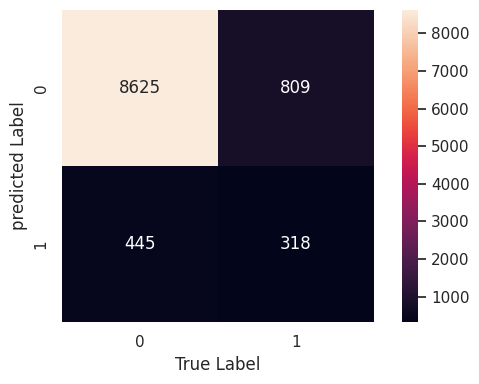

In [73]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(6, 4))
mat = confusion_matrix(y_test,y_pred)
sns.heatmap(mat.T,square=True,annot=True,fmt='d')
plt.xlabel('True Label')
plt.ylabel('predicted Label')
plt.tight_layout()

Random Forest shows an accuracy of 88%.

### Feature Importance 

In [74]:
feature_importances = pd.DataFrame({
    'features': X_train.columns,
    'importance': model.feature_importances_
}).sort_values(by='importance', ascending=True).reset_index()


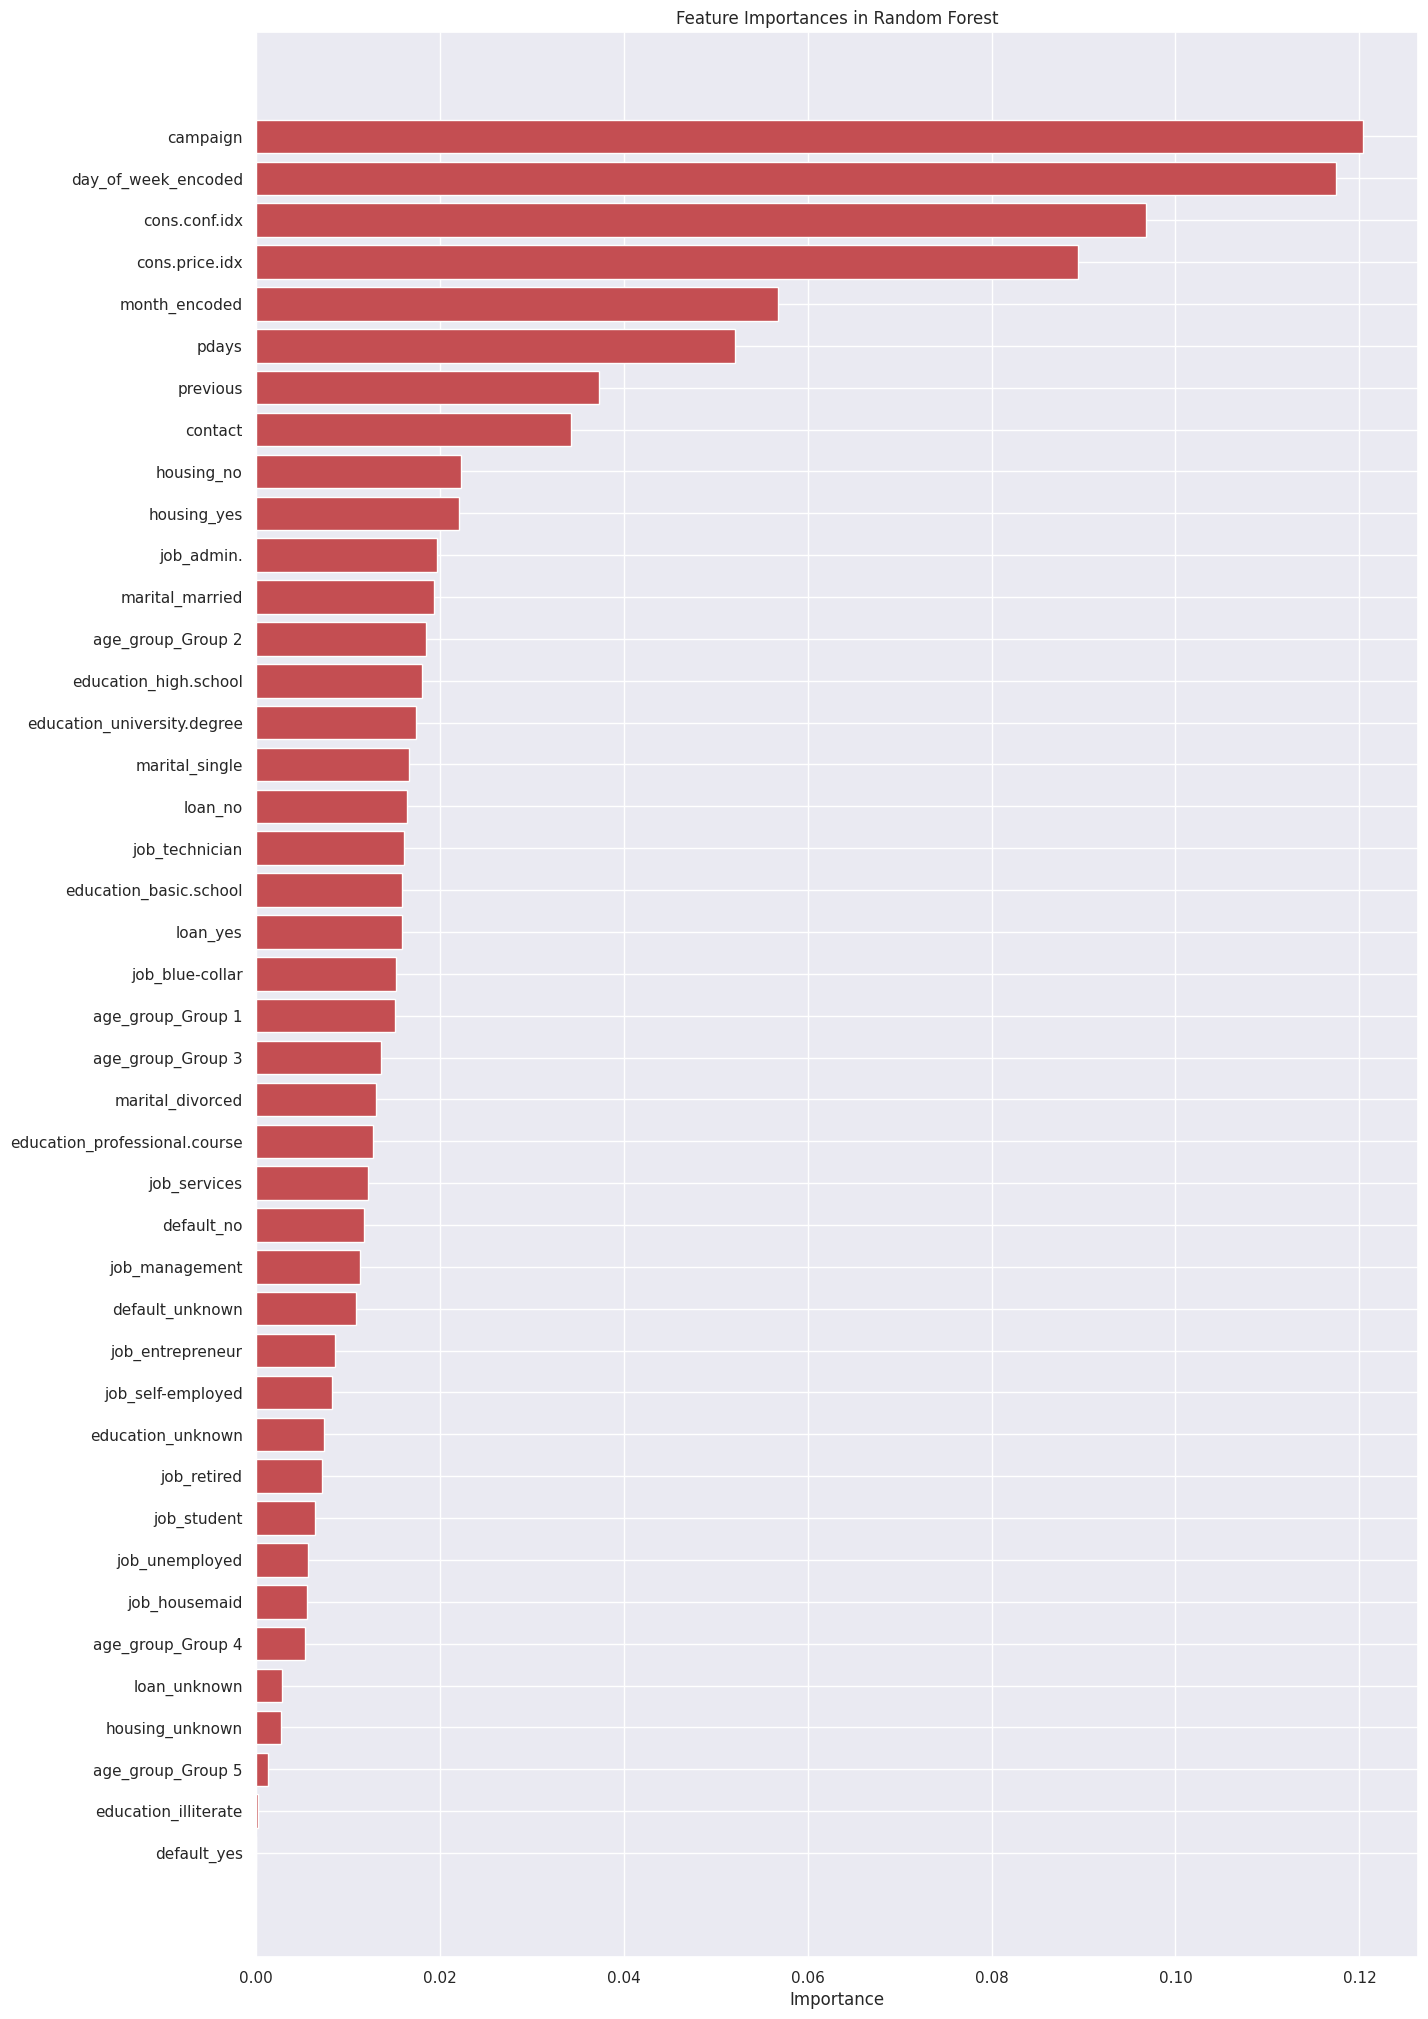

In [75]:
plt.figure(figsize=(15, 25))
plt.title('Feature Importances in Random Forest')
plt.barh(range(len(feature_importances)), feature_importances['importance'], color='r', align='center')
plt.yticks(range(len(feature_importances)), feature_importances['features'])
plt.xlabel('Importance')
plt.show()

Important Features in predicting banking marketing is Campign and days of the week.

### Decision Tree 

In [76]:
from sklearn.tree  import DecisionTreeClassifier
decision_tree_model= DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train) # Train the decision tree classifier
y_pred_dt = decision_tree_model.predict(X_test)

In [77]:
# Print the metrics as a report.
print(metrics.classification_report(y_pred_dt,y_test))

              precision    recall  f1-score   support

           0       0.92      0.91      0.92      9127
           1       0.31      0.33      0.32      1070

    accuracy                           0.85     10197
   macro avg       0.62      0.62      0.62     10197
weighted avg       0.86      0.85      0.85     10197



For class 1, the precision is 0.31, meaning that out of all the instances predicted as class 1, only 31% were correctly predicted. For class 0, the precision is 0.92, indicating that out of all the instances predicted as class 0, 92% were correctly predicted.

For class 0, the recall is 0.91, indicating that out of all the instances of class 0, 91% were correctly identified. For class 1, the recall is 0.33, meaning that out of all the instances of class 1, only 33% were correctly identified.

In [78]:
accuracy = metrics.accuracy_score(y_test, y_pred_dt)
print("Accuracy:", accuracy)

Accuracy: 0.8531921153280376


 This means that 85% of the predictions made by the model were correct.This means that 85% of the predictions made by the model were correct.

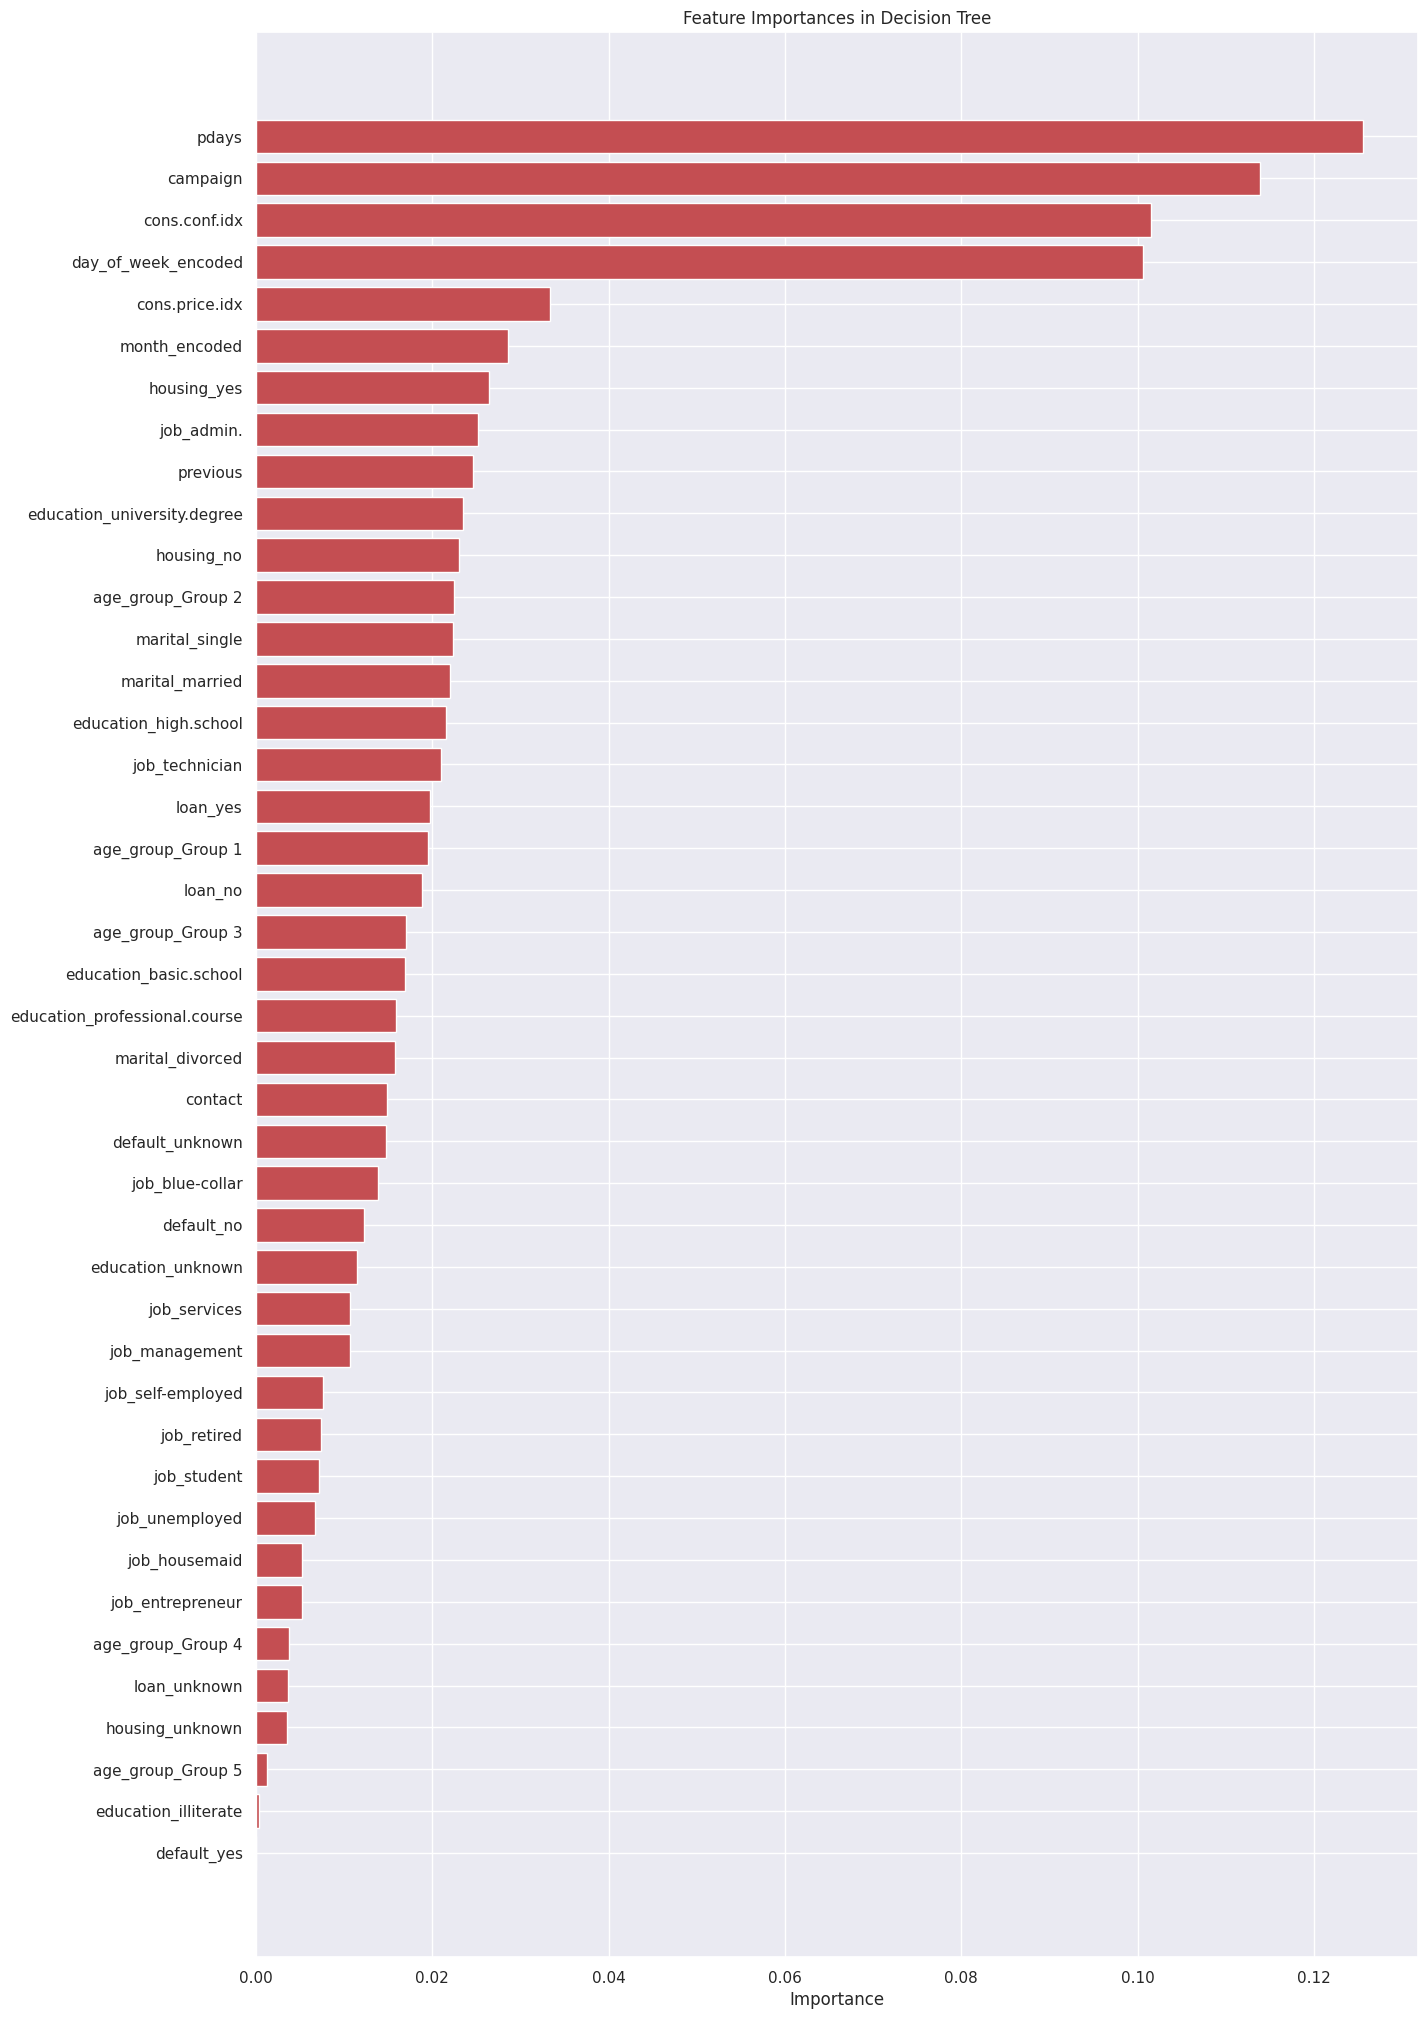

In [80]:
feature_importances = pd.DataFrame({
    'features': X_train.columns,
    'importance': decision_tree_model.feature_importances_
}).sort_values(by='importance', ascending=True).reset_index()

plt.figure(figsize=(15, 25))
plt.title('Feature Importances in Decision Tree')
plt.barh(range(len(feature_importances)), feature_importances['importance'], color='r', align='center')
plt.yticks(range(len(feature_importances)), feature_importances['features'])
plt.xlabel('Importance')
plt.show()

In Decision Tree the feature such as pdays,campaign has significant impact on predicting the model. Other feature such as education,job,matrial also has significant role on it. Here in this model we removed variable 'duration' as this attribute should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.